### Introduction to Neural Network Classification in Tensorflow

In [2]:
# DL needs
import tensorflow as tf
import tensorflow.keras as kr

# Data needs
import pandas as pd
from sklearn.model_selection import train_test_split

# Numerical computation needs
import numpy as np

# plotting needs
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# ensuring reproducibility
random_seed=42
tf.random.set_seed(random_seed)

**5. Multiclass classification**

* More than two different classes
* We will be using the fashion MNIST dataset (without CNNs)

**Fashion MNIST dataset**

* Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
* Data is already been sorted into train and test (using `tensorflow.keras.datasets`)
* Each training and test example is assigned to one of the following labels:

    | Label | Description |
    |-------|-------------|
    | 0     | T-shirt/top |
    | 1     | Trouser     |
    | 2     | Pullover    |
    | 3     | Dress       |
    | 4     | Coat        |
    | 5     | Sandal      |
    | 6     | Shirt       |
    | 7     | Sneaker     |
    | 8     | Bag         |
    | 9     | Ankle boot  |


In [3]:
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels),(test_data,test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 8us/step 
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 39s 1us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 7s 2us/step


In [26]:
# creating dictationary of labels:
labels = ['T-shirt/top', 
          'Trouser', 
          'Pullover',
          'Dress',   
          'Coat',    
          'Sandal',  
          'Shirt',   
          'Sneaker', 
          'Bag',     
          'Ankle boot']

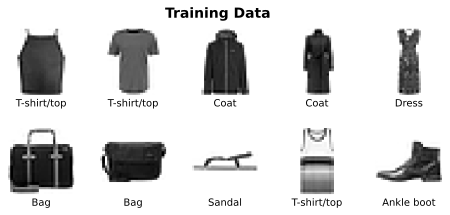

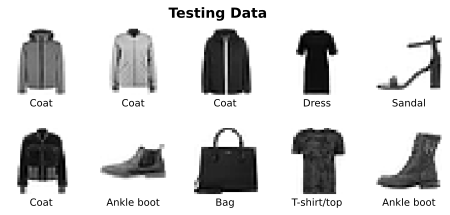

In [52]:
# selecting 10 images randomly 
local_seed=np.random.randint(low=0,high=100)

locs_test=tf.random.uniform(minval=0,maxval=len(test_data),shape=(10,),dtype=tf.int32,seed=local_seed).numpy()
locs_train=tf.random.uniform(minval=0,maxval=len(train_data),shape=(10,),dtype=tf.int32,seed=local_seed).numpy()

def prettify(ax):
    ax.set_xticks([])  # Hide x-axis
    ax.set_yticks([])  # Hide y-axis
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

# visualizing the dataset

# train data
fig,axs=plt.subplots(2,5,figsize=(8,3))
for i, ax in enumerate(axs.flat):  # Flatten the (2,5) grid
    ax.imshow(train_data[locs_train[i]], cmap=plt.cm.binary)
    ax.set_xlabel(labels[train_labels[locs_train[i]]])
    prettify(ax)
fig.subplots_adjust(hspace=0.5)
fig.suptitle("Training Data",fontsize=14,fontweight='bold')
plt.show()

# test data
fig,axs=plt.subplots(2,5,figsize=(8,3))
for i, ax in enumerate(axs.flat):  # Flatten the (2,5) grid
    ax.imshow(test_data[locs_test[i]], cmap=plt.cm.binary)
    ax.set_xlabel(labels[test_labels[locs_test[i]]])
    prettify(ax)
fig.subplots_adjust(hspace=0.5)
fig.suptitle("Testing Data",fontsize=14,fontweight='bold')
plt.show()

In [62]:
# one-hot encode labels
train_labels_ohe=tf.one_hot(train_labels,len(labels))
print(train_labels_ohe[:5])
test_labels_ohe=tf.one_hot(test_labels,len(labels))
print(test_labels_ohe[:5])

tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(5, 10), dtype=float32)
tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]], shape=(5, 10), dtype=float32)


In [ ]:
# creating a model

class FashionNet(kr.Model):
    def __init__(self,lr=0.01,model_name="model_1",metrics=['accuracy']):
        super().__init__(name=model_name)
        # instantiating constructor of parent class

        # input layer:
        self.input_layer=tf.keras.Input(shape=[28,28],name='input_layer')
        
        # flattening the input
        self.flatten=kr.layers.Flatten(input_shape=(28,28),name='flatten')

        # hidden layer:
        self.fc1 = kr.layers.Dense(32,activation=None,name='hl1')
        self.fc2 = kr.layers.Dense(16,activation=None,name='hl2')
        self.fc3 = kr.layers.Dense(8,activation=None,name='hl3')

        # output layer
        self.output_layer=kr.layers.Dense(10,activation=None,name='output_layer')


        # other hyper-params
        self.loss_function="categorical_crossentropy"
        self.optimizer=kr.optimizers.Adam(learning_rate=lr)
        self.eval_metrics=metrics

    def call(self,inputs):
        # forward propogation
        x=self.flatten(inputs)
        x=tf.nn.relu(self.fc1(x))
        x=tf.nn.relu(self.fc2(x))
        x=tf.nn.tanh(self.fc3(x))
        output=tf.nn.softmax(self.output_layer(x))
        return output

In [67]:
model_1 = FashionNet(model_name='model_1',lr=0.01)
model_1(tf.keras.Input(shape=[28,28]))  
model_1.compile(loss=model_1.loss_function,optimizer=model_1.optimizer,metrics=model_1.eval_metrics)
model_1.summary()
history_1=model_1.fit(train_data,train_labels_ohe,epochs=25)


Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hl1 (Dense)                     │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hl2 (Dense)                     │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hl3 (Dense)                     │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │            90 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,874 (101.07 KB)

 Trainable params: 25,874 (101.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25


2025-03-04 14:08:07.037300: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 47040000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0973 - loss: 2.3247
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0980 - loss: 2.3136
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0979 - loss: 2.3136
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0979 - loss: 2.3136
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0979 - loss: 2.3136
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0979 - loss: 2.3136
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.0979 - loss: 2.3136
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0979 - loss: 2.3136
Epoch 9/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0979 - loss: 2.3136
Epoch 10/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0979 - loss: 2.3136
Epoch 11/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0979 - loss: 2.3136
Epoch 12/25
1875/1875 ━━━━━━━━━━━━━━━━━━━

**Note:**
* `tf.keras.losses.CategoricalCrossentropy()`: Used if labels are one-hot encoded
 
* `tf.keras.losses.SparseCategoricalCrossentropy()`: Used if labels are integers 

In [74]:
print(train_data[0].min(),",",train_data[0].max())

0 , 255


**Conclusion:**
* The current model gives not very good accuracy and we need to improve it definitely
* One reason could be the pixel values ranging from 0 to 255 --> needs normalization

***-- CONTD IN NEXT NOTEBOOK --***